In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.multioutput import MultiOutputRegressor

from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import silhouette_score



import pickle

mpl.rc('font', family='Malgun Gothic')

In [3]:
df = pd.read_csv('modeling_df.csv',encoding='utf-8-sig')

In [6]:
df = df.drop(columns='Unnamed: 0')

In [18]:
df.columns

Index(['기업명', '대분류코드', 'RND_유무', '기여율(확정)', '총연구비_합계(원)', '특허활용도', '특허영향력',
       '특허경쟁력', 'AI', '특허인용도', '기술투자지수', '시가총액', '매출액', 'EBITDA', 'ROA', 'PBR',
       'PER', '연구자점수'],
      dtype='object')

In [21]:
X = df[['RND_유무', '기여율(확정)', '총연구비_합계(원)', '특허활용도', '특허영향력',
       '특허경쟁력', 'AI', '특허인용도', '기술투자지수', '시가총액', '매출액', 'EBITDA', 'ROA', 'PBR',
       'PER', '연구자점수']]
X

,RND_유무,기여율(확정),총연구비_합계(원),특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수,시가총액,매출액,EBITDA,ROA,PBR,PER,연구자점수
0,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,10000.000000,108789.848782,8212.467352,0.000000,0.00,0.000,6.0
1,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,53400.740817,96172.458812,11748.061722,0.045930,2.01,156.752,6.0
2,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,1014.000000,169942.042000,50639.134000,0.000000,0.00,0.000,6.0
3,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,550.000000,3703.982304,170.183104,0.000000,0.00,0.000,6.0
4,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,5901.037623,3353.190560,747.423342,0.009846,2.92,17.680,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,1.0,100.0,553000000.0,0.125000,0.0,1.000000,395.375000,0.0,0.034094,1216.968895,925.311758,73.938534,0.000000,0.00,0.000,6.0
3172,1.0,100.0,553000000.0,0.125000,0.0,1.000000,395.375000,0.0,0.034094,1216.968895,925.311758,73.938534,0.000000,0.00,0.000,6.0
3173,1.0,100.0,553000000.0,0.125000,0.0,1.000000,395.375000,0.0,0.034094,1216.968895,925.311758,73.938534,0.000000,0.00,0.000,6.0
3174,1.0,100.0,553000000.0,0.125000,1.0,2.000000,395.375000,5.0,0.017047,1216.968895,925.311758,73.938534,0.000000,0.00,0.000,6.0


In [22]:
cluster = AgglomerativeClustering()
cluster.fit(X)

AgglomerativeClustering()

In [24]:
X['Cluster'] = cluster.fit_predict(X)

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_2340\1437040469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = cluster.fit_predict(X)


C:\tools\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\tools\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


C:\tools\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


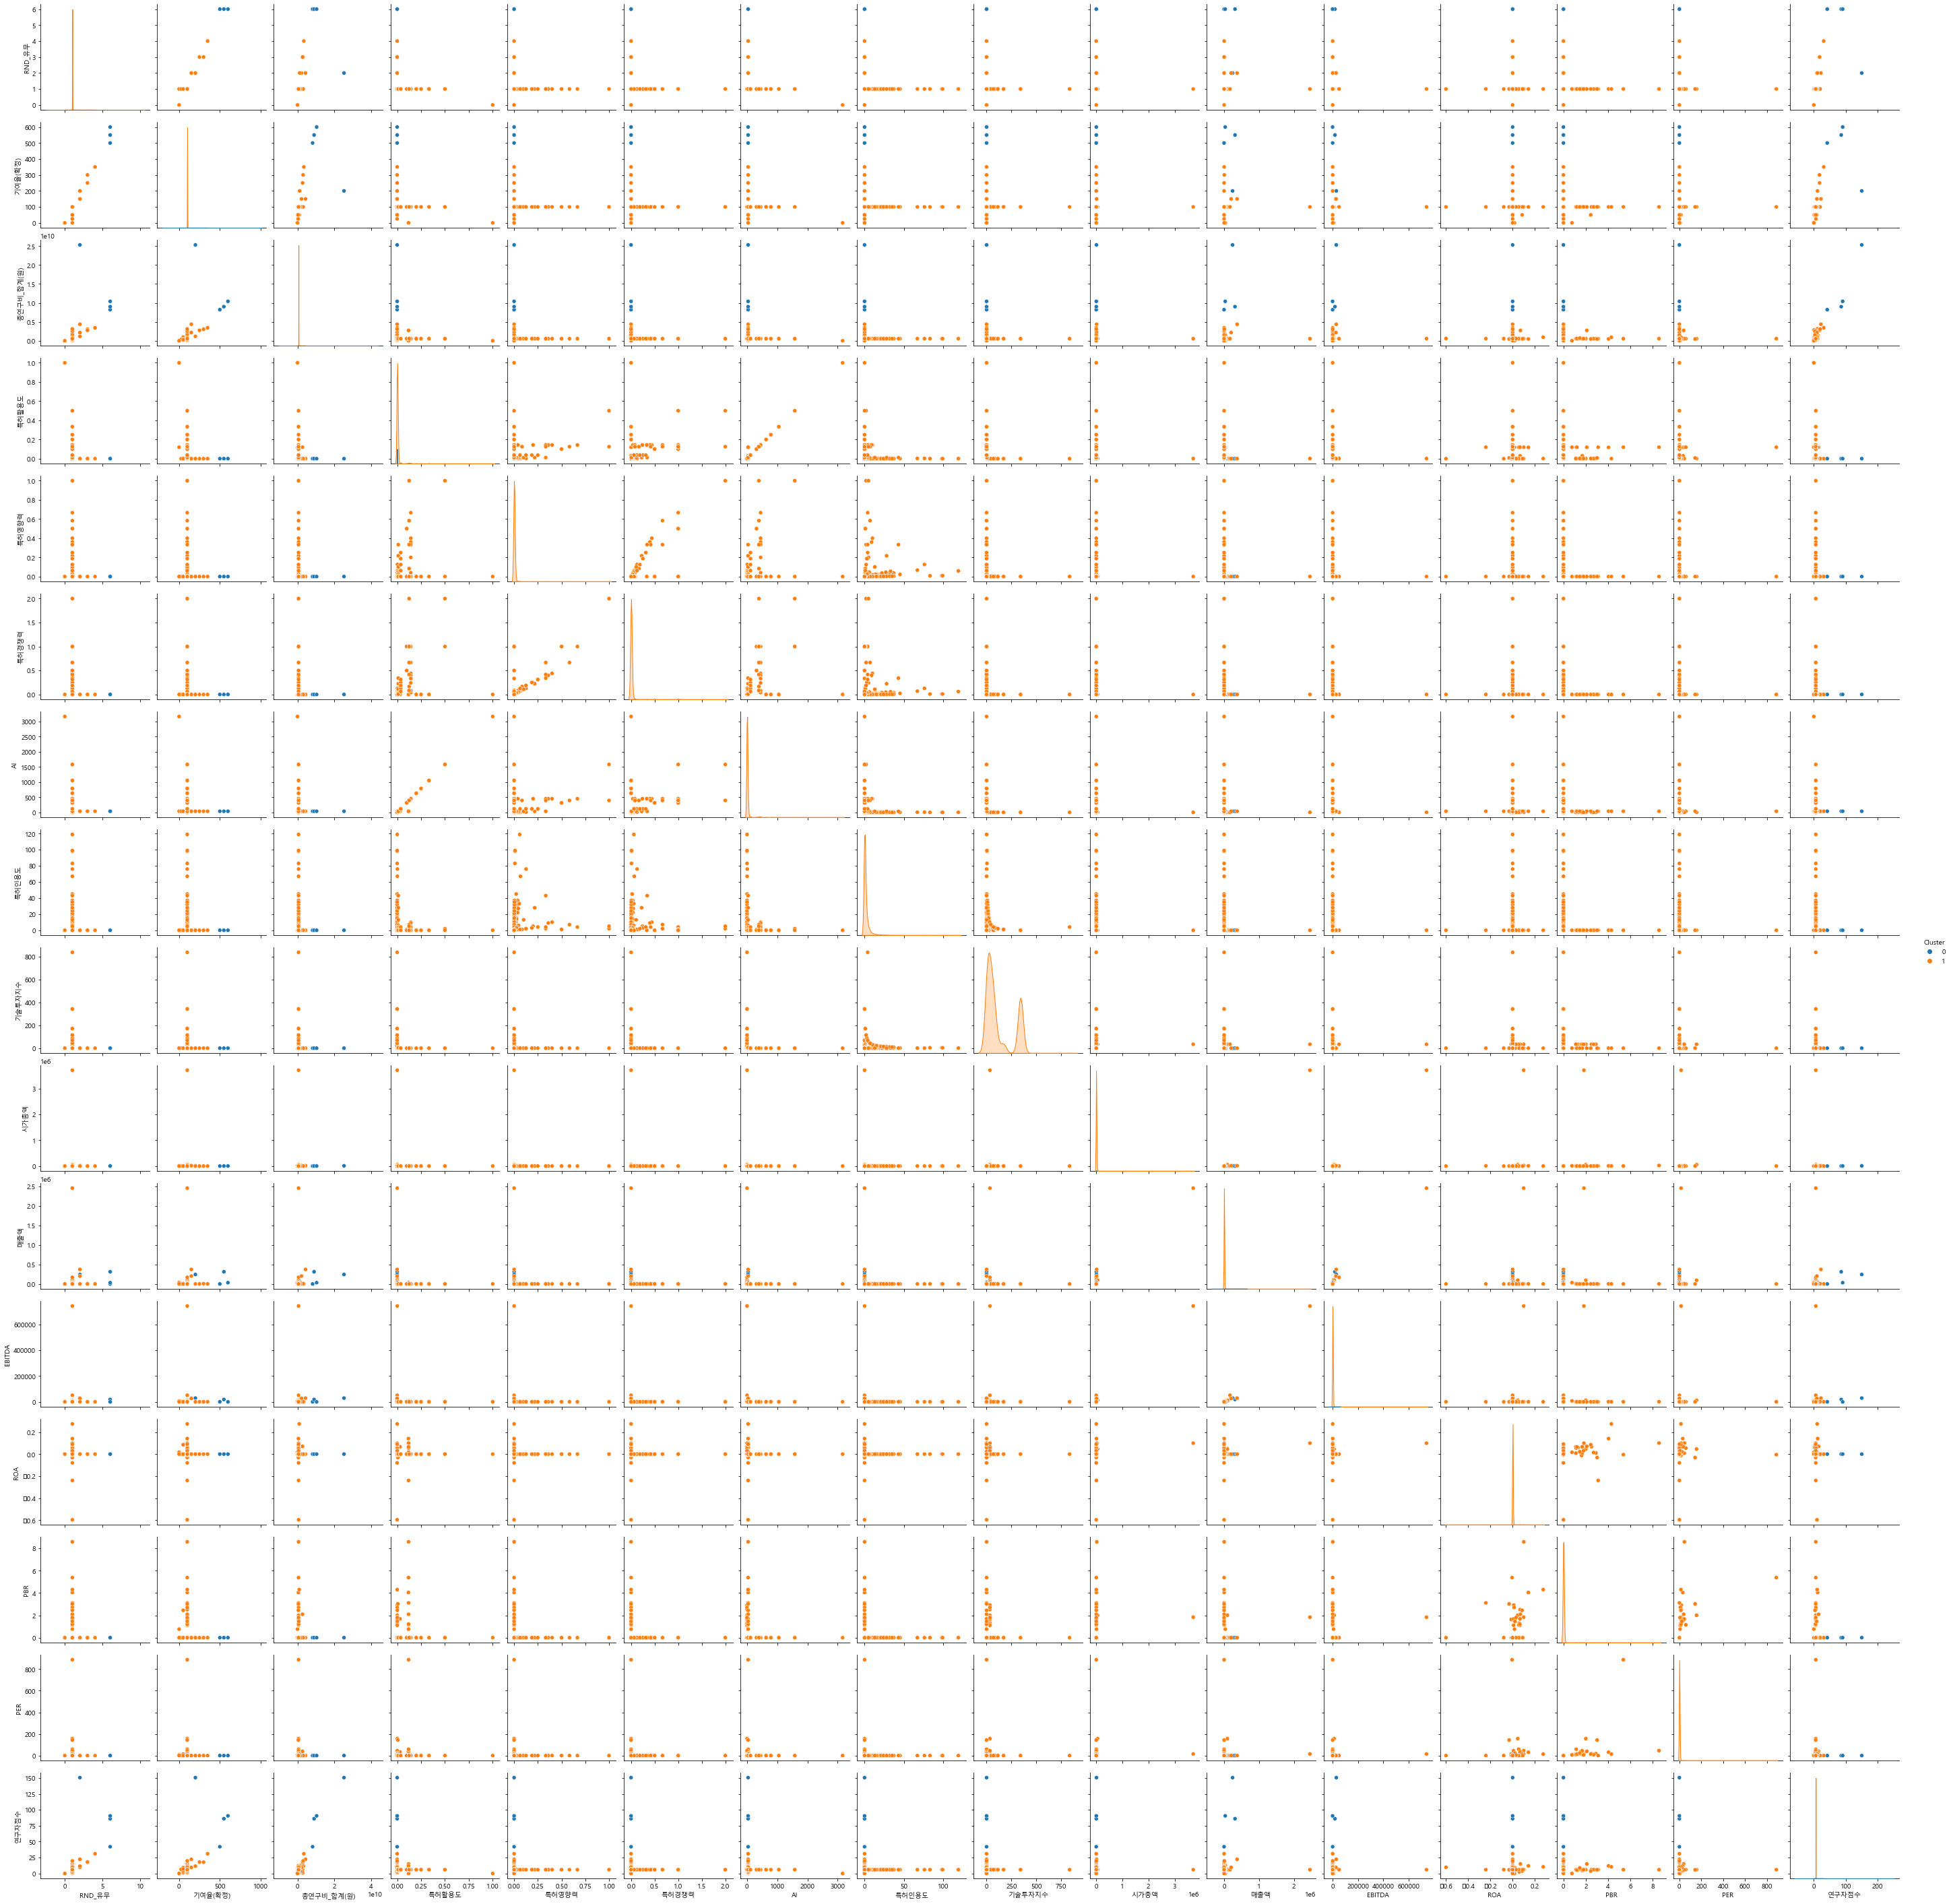

In [25]:
sns.pairplot(data=X, hue='Cluster')

In [26]:
cluster = KMeans(n_clusters=5)
cluster.fit(X)

KMeans(n_clusters=5)

In [27]:
X['kmeans_cluster'] = cluster.fit_predict(X)
X['kmeans_cluster'].value_counts()

0    3155
3      10
4       7
2       3
1       1
Name: kmeans_cluster, dtype: int64

In [30]:
silhouette_score(X, X['kmeans_cluster'])

0.9912968681062624

In [32]:
for i in [2,3,4,5]:
    cluster = KMeans(n_clusters= i)
    cluster.fit(X)
    X_cluster = cluster.fit_predict(X)
    print(i,'개 의 군집 실루엣 :', silhouette_score(X,X_cluster))

2 개 의 군집 실루엣 : 0.9968605945023894
3 개 의 군집 실루엣 : 0.996077626002468
4 개 의 군집 실루엣 : 0.9944615089025444
5 개 의 군집 실루엣 : 0.9912968681062624


In [99]:
df.head()

,기업명,대분류코드,RND_유무,기여율(확정),총연구비_합계(원),특허활용도,특허영향력,특허경쟁력,AI,특허인용도,기술투자지수,시가총액,매출액,EBITDA,ROA,PBR,PER,연구자점수
0,GS건설,Z,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,10000.000000,108789.848782,8212.467352,0.000000,0.00,0.000,6.0
1,LG이노텍,Z,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,53400.740817,96172.458812,11748.061722,0.045930,2.01,156.752,6.0
2,SK텔레콤,Z,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,1014.000000,169942.042000,50639.134000,0.000000,0.00,0.000,6.0
3,계양전기,Z,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,550.000000,3703.982304,170.183104,0.000000,0.00,0.000,6.0
4,네패스,Z,1.0,100.0,553000000.0,0.001067,0.0,0.000399,3.375667,0.0,33.889162,5901.037623,3353.190560,747.423342,0.009846,2.92,17.680,6.0


In [243]:
X = df[['기업명', '대분류코드', '총연구비_합계(원)', '특허활용도', '특허영향력',
       '특허경쟁력', 'AI', '특허인용도', '시가총액', '매출액', 'EBITDA', 'ROA', 'PBR',
       'PER', '연구자점수']]

In [244]:
Y.describe()

count     3176.000000
mean     11956.381677
std      13535.496053
min          0.000000
25%       1721.733085
50%       6886.932341
75%      34202.824380
max      83680.808024
dtype: float64

In [245]:
Y_1 = df['기술투자지수'] * df['RND_유무'] * df['기여율(확정)']

In [258]:
df['기여율(확정)'].value_counts()

100.0    3157
50.0        6
0.0         2
200.0       2
150.0       2
500.0       1
550.0       1
300.0       1
250.0       1
350.0       1
25.0        1
600.0       1
Name: 기여율(확정), dtype: int64

In [260]:
df['RND_유무'].value_counts()

1.0    3165
2.0       4
6.0       3
3.0       2
4.0       1
0.0       1
Name: RND_유무, dtype: int64

In [246]:
Y_1.quantile(q=0.8)

34202.82437976119

In [247]:
y_2 = []

for i in Y_1:
    if i < Y_1.quantile(q=0.2):
        y_2.append(1)
    elif Y_1.quantile(q=0.2)<= i<Y_1.quantile(q=0.4):
        y_2.append(2)
    elif Y_1.quantile(q=0.4)<=i<Y_1.quantile(q=0.6):
        y_2.append(3)
    elif Y_1.quantile(q=0.6)<=i<Y_1.quantile(q=0.8):
            y_2.append(4)
    else:
        y_2.append(5)

In [248]:
Y = pd.DataFrame(y_2)

In [249]:
Y

,0
0,3
1,3
2,3
3,3
4,3
...,...
3171,1
3172,1
3173,1
3174,1


In [250]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1234)

In [251]:
X = df[['총연구비_합계(원)', '특허활용도', '특허영향력',
       '특허경쟁력', 'AI', '특허인용도', '시가총액', '매출액', 'EBITDA', 'ROA', 'PBR',
       'PER', '연구자점수']]

In [253]:
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
result = multi_target_forest.fit(X, Y).predict(X)

In [254]:
Y_test_pred = multi_target_forest.fit(X_train, Y_train).predict(X_test)
Y_train_pred = multi_target_forest.fit(X_train, Y_train).predict(X_train)

ValueError: could not convert string to float: '식회사유일기연한국인프라'

In [255]:
print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       435
           2       1.00      1.00      1.00       318
           3       1.00      1.00      1.00       334
           4       1.00      1.00      1.00       581
           5       1.00      1.00      1.00       555

    accuracy                           1.00      2223
   macro avg       1.00      1.00      1.00      2223
weighted avg       1.00      1.00      1.00      2223

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00       134
           3       0.99      1.00      1.00       135
           4       1.00      1.00      1.00       241
           5       1.00      1.00      1.00       250

    accuracy                           1.00       953
   macro avg       1.00      1.00      1.00       953
weighted avg       1.00      1.00      1.00       953



In [208]:
df1 = df.copy()

In [209]:
result = pd.DataFrame(result).rename(columns = {0:'결과'})

In [210]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
# row 생략 없이 출력
pd.set_option('display.max_rows', 1000)
# col 생략 없이 출력
pd.set_option('display.max_columns', 1000)

In [211]:
result1 = pd.concat([df1['기업명'],result],axis=1)

In [223]:
result1['결과'].value_counts()

4    822
5    805
1    628
3    469
2    452
Name: 결과, dtype: int64

In [213]:
len(result)

3176

In [234]:
result1.to_csv('result.csv',encoding='utf-8-sig',index=False)

In [224]:
result1[result1['결과'] == 5]

,기업명,결과
98,센스톤,5
1824,76소프트,5
1825,가안인싸이트,5
1829,가온플랫폼,5
1831,가천의과학대학교산학협력단,5
1832,강남엄마,5
1835,게임게이트,5
1836,경운대학교산학협력단이엠에스커뮤니케이션즈,5
1838,고어텍인크,5
1840,고큐바테크놀로지,5


In [225]:
result1[result1['결과'] == 4]

,기업명,결과
552,가보산업,4
555,가온씨앤디,4
558,강남건설식회사,4
559,강남이앤알,4
560,강남전기,4
561,강성환,4
562,강원건설,4
564,건영글로벌식회사,4
565,건영산업,4
566,건영전기,4


In [226]:
result1[result1['결과'] == 3]

,기업명,결과
0,GS건설,3
1,LG이노텍,3
2,SK텔레콤,3
3,계양전기,3
4,네패스,3
13,링네트,3
15,비트컴퓨터,3
16,삼성모바일디스플레이,3
17,삼성전자,3
18,솔고바이오,3


In [227]:
result1[result1['결과'] == 2]

,기업명,결과
115,김유환,2
124,노리앤드,2
131,다온시스,2
146,동국대학교경캠퍼스산학협력단,2
148,동양테크,2
163,레이맥스,2
165,레지에나,2
180,메카모아성우건설식회사,2
181,메탈솔루션즈,2
194,보명이앤씨,2


In [228]:
result1[result1['결과'] == 1]

,기업명,결과
5,노루홀딩스,1
6,녹십자,1
7,다우기술,1
8,대웅제약,1
9,대원제약,1
10,더존비즈온,1
11,덴티움,1
12,동아지질,1
14,모토닉,1
24,안국약품,1


In [220]:
X = df[['기업명', '대분류코드', 'RND_유무', '기여율(확정)', '총연구비_합계(원)', '특허활용도', '특허영향력',
       '특허경쟁력', 'AI', '특허인용도', '시가총액', '매출액', 'EBITDA', 'ROA', 'PBR',
       'PER', '연구자점수']]

In [229]:
Y = df['기술투자지수'] * df['RND_유무'] * df['기여율(확정)']

In [230]:
numeric_pipe = make_pipeline(KNNImputer(), MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())
numeric_list = df.describe().columns.tolist()
category_list = df.describe(include = 'object').columns.tolist()

preprocess_pipe = make_column_transformer((numeric_pipe, numeric_list), (category_pipe, category_list))
forest = RandomForestClassifier(random_state=1)
model_pipe = make_pipeline(preprocess_pipe, ADASYN(), MultiOutputClassifier(forest, n_jobs=2))

In [233]:
hyperparameter_list = {}

grid_model = GridSearchCV(model_pipe, param_grid = hyperparameter_list, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_train, Y_train)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\tools\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: '기술투자지수'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\DMC CONET\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\__init__.py", line 416, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "C:\tools\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3623, in get_loc
    raise KeyError(key) from err
KeyError: '기술투자지수'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\DMC CONET\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DMC CONET\AppData\Roaming\Python\Python39\site-packages\imblearn\pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\DMC CONET\AppData\Roaming\Python\Python39\site-packages\imblearn\pipeline.py", line 216, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\tools\Anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\DMC CONET\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\DMC CONET\AppData\Roaming\Python\Python39\site-packages\sklearn\compose\_column_transformer.py", line 687, in fit_transform
    self._validate_column_callables(X)
  File "C:\Users\DMC CONET\AppData\Roaming\Python\Python39\site-packages\sklearn\compose\_column_transformer.py", line 374, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "C:\Users\DMC CONET\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\__init__.py", line 424, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [ ]:
best_model = grid_model.best_estimator_
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

In [256]:
X_train

,기업명,대분류코드,총연구비_합계(원),특허활용도,특허영향력,특허경쟁력,AI,특허인용도,시가총액,매출액,EBITDA,ROA,PBR,PER,연구자점수
2348,식회사유일기연한국인프라,J,553000000.0,0.000039,0.000000,0.000100,2.603292,0.0,1216.968895,925.311758,73.938534,0.0,0.0,0.0,6.0
1238,영일렉트로닉,F,553000000.0,0.001067,0.002475,0.002970,3.375667,5.0,1216.968895,925.311758,73.938534,0.0,0.0,0.0,6.0
1381,지오텍엔지니어링,F,553000000.0,0.001067,0.000495,0.000990,3.375667,1.0,1216.968895,925.311758,73.938534,0.0,0.0,0.0,6.0
942,식회사디캐릭,F,553000000.0,0.001067,0.000990,0.001485,3.375667,2.0,1216.968895,925.311758,73.938534,0.0,0.0,0.0,6.0
2514,아이원,J,553000000.0,0.000039,0.000399,0.000498,2.603292,4.0,1216.968895,925.311758,73.938534,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,대원씨앤씨,F,553000000.0,0.001067,0.001485,0.001980,3.375667,3.0,1216.968895,925.311758,73.938534,0.0,0.0,0.0,6.0
3125,홍익대학교산학협력단,M,553000000.0,0.011494,0.000000,0.007752,36.356322,0.0,1216.968895,925.311758,73.938534,0.0,0.0,0.0,6.0
1318,이스젠이솔테크,F,553000000.0,0.001067,0.000000,0.000495,3.375667,0.0,1216.968895,925.311758,73.938534,0.0,0.0,0.0,6.0
723,두레정보통신,F,553000000.0,0.001067,0.000000,0.000495,3.375667,0.0,1216.968895,925.311758,73.938534,0.0,0.0,0.0,6.0


from sklearn.multioutput import MultiOutputClassifier

numeric_pipe = make_pipeline(KNNImputer(), MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())
numeric_list = df.describe().columns.tolist()
category_list = df.describe(include = 'object').columns.tolist()

preprocess_pipe = make_column_transformer((numeric_pipe, numeric_list), (category_pipe, category_list))
forest = RandomForestClassifier(random_state=1)
model_pipe = make_pipeline(preprocess_pipe, ADASYN(), MultiOutputClassifier(forest, n_jobs=2))

hyperparameter_list = {}

grid_model = GridSearchCV(model_pipe, param_grid = hyperparameter_list, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_train, Y_train)

MultiOutputRegressor(GradientBoostingRegressor(random_state=1234)).fit(X,Y).predict(X)

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
X, y1 = make_classification(n_samples=10, n_features=100,
                            n_informative=30, n_classes=3,
                            random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
Y = np.vstack((y1, y2, y3)).T
n_samples, n_features = X.shape # 10,100
n_outputs = Y.shape[1] # 3
n_classes = 3
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
multi_target_forest.fit(X, Y).predict(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1234)

numeric_pipe = make_pipeline(KNNImputer(), MinMaxScaler())
category_pipe = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())
numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist()

preprocess_pipe = make_column_transformer((numeric_pipe, numeric_list), (category_pipe, category_list))

model_pipe = make_pipeline(preprocess_pipe, ADASYN(), RandomForestClassifier())

hyperparameter_list = {
    'randomforestclassifier__max_depth' : range(5, 11),
    'randomforestclassifier__min_samples_leaf' : range(5, 11),
    'randomforestclassifier__min_samples_split' : range(5, 11)
}

grid_model = GridSearchCV(model_pipe, param_grid = hyperparameter_list, cv = 5, n_jobs = -1, scoring = 'f1')
grid_model.fit(X_train, Y_train)

best_model = grid_model.best_estimator_
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)
df_importance['Importance'] = best_model['randomforestclassifier'].feature_importances_

df_importance

sns.barplot(data = df_importance, x = 'Feature', y = 'Importance')

# 모델 파일형태로 저장
pickle.dump(best_model, open('model_best.sav', 'wb'))

In [ ]:
Y_1 = df['기술투자지수'] * df['RND_유무'] * df['기여율(확정)']